In [83]:
import pandas
import seaborn

In [84]:
# načítanie dát
filename = "032/labor.csv"
df = pandas.read_csv(filename, sep='\t')
df.tail()


,Unnamed: 0,indicator,erytrocyty,smoker,weight,trombocyty,alp,hbver,etytr,relationship,ssn,leukocyty,ast,hematokrit,er-cv,hemoglobin,name,alt
9917,9917,1.0,7.92703,no,91.00875,7.32437,7.89392,5.58123,3.90769,single,222-02-8839,7.86491,32.48746,5.55737,68.86183,9.06266,Kathryn Joseph,1.23304
9918,9918,1.0,4.79625,no,2.41949,5.07378,71.42731,5.63469,4.55839,separated,178-80-3826,5.87616,66.92216,6.52756,44.38480,7.20484,Matthew Hampton,0.54876
9919,9919,1.0,7.75338,Y,52.16544,7.05607,70.20597,7.76704,5.08319,separated,117-91-4520,8.55812,57.18525,8.04531,36.38706,5.20149,James Nicholson,1.04357
9920,9920,0.0,7.75073,Y,15.83292,7.33310,78.44987,7.51062,8.47775,divoced,876-69-2400,7.29457,48.81077,7.64010,62.68887,5.52321,Michael Brown,1.18430
9921,9921,0.0,7.85219,no,65.28356,7.27391,35.52075,4.58541,5.34337,single,190-02-7522,6.48293,57.15174,7.03839,66.12604,4.31294,Carol Howard,1.35656


In [85]:
# TODO: Základný opis dát spolu s ich charakteristikami
row_count, column_count = df.shape

# počet záznamov
print("Number of records ", row_count)

# počet atribútov
print("Number of attributes ", column_count)

Number of records  9922
Number of attributes  18


In [86]:
# typy atribútov
print("\nTypes of atributes: ")
print(df.dtypes)


Types of atributes: 
Unnamed: 0        int64
indicator       float64
erytrocyty      float64
smoker           object
weight          float64
trombocyty      float64
alp             float64
hbver           float64
etytr           float64
relationship     object
ssn              object
leukocyty       float64
ast             float64
hematokrit      float64
er-cv           float64
hemoglobin      float64
name             object
alt             float64
dtype: object


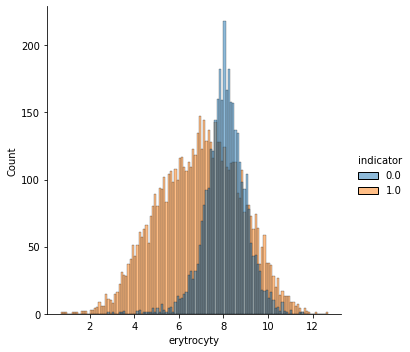

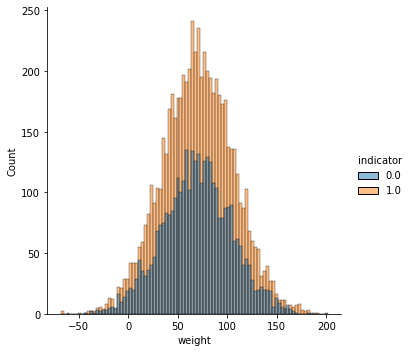

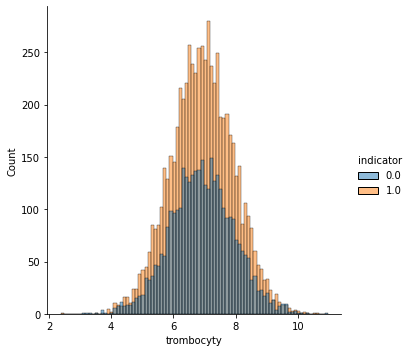

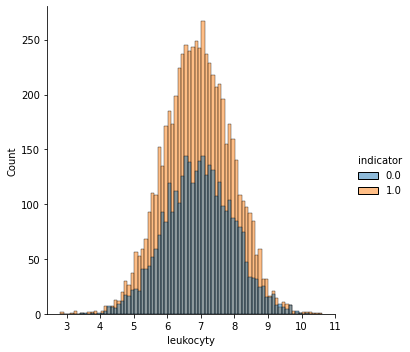

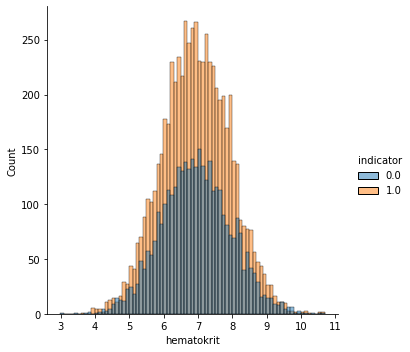

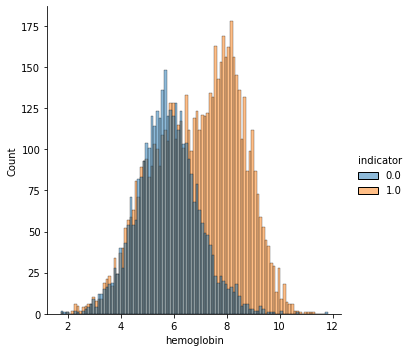

In [87]:
# distribúcia
seaborn.displot(x = "erytrocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "weight", hue = "indicator", binwidth=3, data = df)
seaborn.displot(x = "trombocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "leukocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "hematokrit", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "hemoglobin", hue = "indicator", binwidth=0.1, data = df)

In [88]:
# základné deskriptívne štatistiky
print(df.describe())

# count = počet záznamov .. ľahko vidíme, koľko dát z daného stĺpca chýba
# mean = aritmetický priemer
# std = smerodajná odchýlka, hovorí o veľkosti rozptylu dát oproti aritmetickému priemeru

        Unnamed: 0    indicator   erytrocyty       weight   trombocyty  \
count  9922.000000  9922.000000  9892.000000  9922.000000  9893.000000   
mean   4960.500000     0.643923     7.354813    70.033130     6.929616   
std    2864.379019     0.478863     1.655995    35.360537     1.010643   
min       0.000000     0.000000     0.695010   -68.224370     2.373590   
25%    2480.250000     0.000000     6.341305    46.241730     6.257310   
50%    4960.500000     1.000000     7.627100    70.063115     6.923910   
75%    7440.750000     1.000000     8.480747    93.885320     7.610340   
max    9921.000000     1.000000    12.598130   199.399280    10.907460   

               alp        hbver        etytr    leukocyty          ast  \
count  9893.000000  9893.000000  9893.000000  9893.000000  9893.000000   
mean     58.523833     6.924524     6.146493     6.929109    51.940039   
std      25.531979     1.443274     1.615464     1.006582    12.668313   
min       0.000000     1.413770     0

In [89]:
# TODO: Identifikácia problémov v dátach s navrhnutým riešením

# premenovať prvý stĺpec Unnamed: 0 na id pacienta
df = df.rename(columns={"Unnamed: 0": "patient_id"})

# Stĺpec smoker má hodnoty yes/no/Y/N .. upravíme to na 1/0
# pandas.unique(df.smoker)
df.smoker = df.smoker.replace({"Y": 1, "N": 0, "yes": 1, "no": 0})

# skontrolujeme, v ktorých stĺpcoch chýbajú dáta
df.isnull().any()


patient_id      False
indicator       False
erytrocyty       True
smoker          False
weight          False
trombocyty       True
alp              True
hbver            True
etytr            True
relationship    False
ssn             False
leukocyty        True
ast              True
hematokrit       True
er-cv            True
hemoglobin       True
name            False
alt              True
dtype: bool